In [12]:
# !pip install lightgbm
# !pip install xgboost

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import os  
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import plotly as plt
import random


2023-08-28 12:37:41.832093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-08-28 12:37:41.832127: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_all = pd.read_csv("/project/MERGED.csv")

In [3]:
df = df_all.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 36 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief Name                                          251 non-null    object 
 1   Client                                              251 non-null    object 
 2   Shortlisted Agency                                  251 non-null    object 
 3   Agency Skills                                       210 non-null    object 
 4   Agency Industries                                   210 non-null    object 
 5   Service Description                                 220 non-null    object 
 6   Agency Description                                  226 non-null    object 
 7   Agency services                                     226 non-null    object 
 8   Other Services                                      155 non-null    object 
 9  

In [5]:
columns_to_drop = [
    "Match Score",
    "Lead_George Patten",
    "Lead_Gideon Hyde",
    "Lead_Hannah Fraser",
    "Lead_Kate Walker",
    "Lead_Paul Bowman",
    "Lead_Peter Sayburn",
    "Lead_Phil Kohler",
    "Lead_Robin Scarborough",
    "Number of Agencies Shortlisted Brief", 
    "Client_WA_Interaction",'Service Description',
    'Agency Description', 'Agency services', 'Other Services',
    'Vision', 'Industry Experience', 'Status', 'Winning Agency'
]

df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief Name                                          251 non-null    object 
 1   Client                                              251 non-null    object 
 2   Shortlisted Agency                                  251 non-null    object 
 3   Agency Skills                                       210 non-null    object 
 4   Agency Industries                                   210 non-null    object 
 5   Agency Locations                                    235 non-null    object 
 6   Brief Region                                        251 non-null    object 
 7   Project extension with same agency                  251 non-null    int64  
 8   Client selected agency themselves from marketplace  251 non-null    float64
 9  

In [6]:
# List of columns to be encoded
columns_to_encode = [
    "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"
]

# Drop rows with NaN in the specified columns
df = df.dropna(subset=columns_to_encode)

# Select specific columns
subset = df[[ "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"]]

# Print the subset
subset

,Sub Brief Taxonomy,Main Brief Taxonomy,Agency Skills,Agency Industries
0,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),"(Copywriting), (PR)",(Professional_Services)
1,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),"(Brand_Strategy), (Copywriting), (Corporate_Co...","(Administrative_and_Support_Services), (Alcoho..."
2,(Video_Production),"(Production Services), (Advertising_Brand & Cr...","(Brand_Design), (Customer_Experience_Design), ...","(Alcoholic_Beverages), (Automotive), (Beauty),..."
3,(Video_Production),"(Production Services), (Advertising_Brand & Cr...","(Brand_Design), (UX_&_UI_Design), (Mobile_App_...",(B2B)
4,(Proposition_Design),(Experience & Design),"(Business_Strategy), (CRM_Strategy), (Customer...","(Alcoholic_Beverages), (Beauty), (Education), ..."
...,...,...,...,...
244,"(Quantitative_Research), (Qualitative_Research)",(Data_Insight & Research),"(Business_Strategy), (Customer_Strategy), (Qua...","(Alcoholic_Beverages), (Beauty), (Construction..."
245,"(Quantitative_Research), (Qualitative_Research)",(Data_Insight & Research),"(Social_Media), (Video_Production)",(B2B)
246,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events),"(Data_Analytics), (Advertising), (Brand_Strate...","(Alcoholic_Beverages), (Beauty), (Entertainmen..."
247,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events),"(Advertising), (Social_Media), (Creative_Produ...","(Beauty), (Education), (Entertainment), (Fashi..."


## Encoding for Agency Locations and Brief Region

In [7]:
# Display the unique values in 'Agency Locations' and 'Brief Region' columns
print("Unique values in 'Agency Locations':", df['Agency Locations'].unique())
print("Unique values in 'Brief Region':", df['Brief Region'].unique())

# Convert the comma-separated values in 'Agency Locations' into a list of locations
# Replace nan values with empty string before splitting
df['Agency Locations'] = df['Agency Locations'].fillna('')
df['Agency Locations List'] = df['Agency Locations'].str.split(', ')

# Create a binary column for each unique location in 'Agency Locations'
# Using a conditional generator expression to skip nan values
unique_locations = set(location for locations in df['Agency Locations List'] if isinstance(locations, list) for location in locations)
for location in unique_locations:
    df[f'AgencyLocations_{location.strip()}'] = df['Agency Locations List'].apply(lambda x: 1 if location.strip() in x else 0)

# Drop the original 'Agency Locations' and 'Agency Locations List' columns
df = df.drop(columns=['Agency Locations', 'Agency Locations List'])

# Remove trailing white spaces from 'Brief Region'
df['Brief Region'] = df['Brief Region'].str.strip()

# Display the unique values after removing white spaces
print("Unique values in 'Brief Region' after removing white spaces:", df['Brief Region'].unique())

# One hot encode the 'Brief Region' column, prefix the column names, and drop the original column
one_hot_brief = pd.get_dummies(df['Brief Region'], prefix='BriefRegion')
df = pd.concat([df.drop('Brief Region', axis=1), one_hot_brief], axis=1)

df = df.reset_index()
df.head()


Unique values in 'Agency Locations': ['United Kingdom' 'United Kingdom, United States'
 'Australia, United Kingdom, United States' 'Australia'
 'Australia, United Kingdom' 'Australia, United States' 'United States']
Unique values in 'Brief Region': ['united kingdom' 'australia' 'united states']
Unique values in 'Brief Region' after removing white spaces: ['united kingdom' 'australia' 'united states']


,index,Brief Name,Client,Shortlisted Agency,Agency Skills,Agency Industries,Project extension with same agency,Client selected agency themselves from marketplace,Right geography / time zone,Strong skill set match,...,Right price level,Strong track record,Sub Brief Taxonomy,Main Brief Taxonomy,AgencyLocations_United Kingdom,AgencyLocations_Australia,AgencyLocations_United States,BriefRegion_australia,BriefRegion_united kingdom,BriefRegion_united states
0,0,Awards applications x5,AXA,Boost Awards,"(Copywriting), (PR)",(Professional_Services),0,0.0,1,1,...,0,1,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),1,0,0,0,1,0
1,1,Awards applications x5,AXA,Reed Words,"(Brand_Strategy), (Copywriting), (Corporate_Co...","(Administrative_and_Support_Services), (Alcoho...",0,0.0,1,1,...,0,1,"(PR), (Corporate_Communication)",(Media_Public Relations & Events),1,0,1,0,1,0
2,2,Countrywide broker video,AXA,Viewpoint Studios,"(Brand_Design), (Customer_Experience_Design), ...","(Alcoholic_Beverages), (Automotive), (Beauty),...",0,0.0,0,1,...,1,0,(Video_Production),"(Production Services), (Advertising_Brand & Cr...",1,0,0,0,1,0
3,3,Countrywide broker video,AXA,Shoreditch Design Studio,"(Brand_Design), (UX_&_UI_Design), (Mobile_App_...",(B2B),0,0.0,0,1,...,1,1,(Video_Production),"(Production Services), (Advertising_Brand & Cr...",1,1,1,0,1,0
4,4,Prop Dev (EV and CC Insurance),AXA,Blue Feathers,"(Business_Strategy), (CRM_Strategy), (Customer...","(Alcoholic_Beverages), (Beauty), (Education), ...",0,1.0,1,1,...,0,0,(Proposition_Design),(Experience & Design),1,0,0,0,1,0


## Encoding for Agency Skills, Agency Industries, Sub Brief Taxonomy, Main Brief Taxonomy

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# List of columns to be encoded
columns_to_encode = [
    "Sub Brief Taxonomy",
    "Main Brief Taxonomy",
    "Agency Skills",
    "Agency Industries"
]

# Function to extract values enclosed in parentheses
def extract_labels(s):
    s = s.replace('\t', ',') 
    return re.findall(r'\((.*?)\)', s)

# Preprocess each column and use MultiLabelBinarizer
for column in columns_to_encode:
    # Apply extract_labels to the column
    df[column] = df[column].apply(extract_labels)
    
    # Initialize the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    # Transform the column and create a new DataFrame with the encoded values
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column]), columns=mlb.classes_)
    
    # Optionally, you can add a prefix to the columns to keep track of the original column name
    df_encoded.columns = [f'{column}_{cls}' for cls in df_encoded.columns]
    
    # Concatenate the encoded DataFrame to the original DataFrame
    df = pd.concat([df, df_encoded], axis=1)
    
    # Optionally, you can drop the original column
    df.drop(column, axis=1, inplace=True)

In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score


# 1. Generate Negative Samples
all_agencies = df['Shortlisted Agency'].unique()
negative_samples = []

for index, row in df.iterrows():
    random_agency = np.random.choice(all_agencies)
    while ((df['Brief Name'] == row['Brief Name']) & (df['Shortlisted Agency'] == random_agency)).any():
        random_agency = np.random.choice(all_agencies)
    
    negative_sample = row.copy()
    negative_sample['Shortlisted Agency'] = random_agency
    negative_samples.append(negative_sample)

negative_df = pd.DataFrame(negative_samples)
df = pd.concat([df, negative_df], ignore_index=True)

df['match'] = 1
df.loc[df.index >= len(df) // 2, 'match'] = 0

# 2. Splitting Data
X = df.drop(columns=['Client', 'Brief Name', 'Shortlisted Agency', 'match'])
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [10]:
# 3. Train XGBoost Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
# 4. Evaluation
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# MAP
map_score = average_precision_score(y_test, y_pred_proba)
print(f"MAP: {map_score}")
from sklearn.metrics import average_precision_score

# NDCG function definition
def ndcg(y_true, y_score, k=None):
    """Compute Normalized Discounted Cumulative Gain."""
    # Order the scores
    ranking = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, ranking[:k])
    
    # Compute DCG
    dcg = np.sum(y_true / np.log2(np.arange(2, y_true.size + 2)))
    
    # Compute IDCG (Ideal DCG, where all the relevant items are placed at the top of the ranking)
    idcg = np.sum(np.ones_like(y_true) / np.log2(np.arange(2, y_true.size + 2)))
    
    # Compute NDCG
    return dcg / idcg



ndcg_value = ndcg(np.array([y_test.tolist()]), np.array([y_pred_proba.tolist()]))
print(f"NDCG: {ndcg_value}")


# 5. Recommend Agencies for a Random Brief
def recommend_agencies_for_random_brief():
    random_brief = df.sample(1).iloc[0]
    all_agencies_data = df[df['Brief Name'] == random_brief['Brief Name']]
    
    X_recommend = all_agencies_data.drop(columns=['Client', 'Brief Name', 'Shortlisted Agency', 'match'])
    scores = model.predict_proba(X_recommend)[:, 1]

    results = pd.DataFrame({
        'Agency': all_agencies_data['Shortlisted Agency'],
        'Score': scores
    })
    
    recommended_agencies = results.sort_values(by='Score', ascending=False)
    return recommended_agencies

recommendations = recommend_agencies_for_random_brief()
print(recommendations.head(10))


Precision: 0.16326530612244897
Recall: 0.19047619047619047
F1 Score: 0.1758241758241758
MAP: 0.3142542898062663
NDCG: 0.6172567380135888
                              Agency     Score
148                   Manifest Group  0.980651
357                Polar Media House  0.980651
144                       2050London  0.910457
353             Dupree International  0.910457
143                 Studio Something  0.507022
352                            Apex1  0.507022
147                             MB&a  0.503710
356                    Tinker Taylor  0.503710
146                    Blue Feathers  0.501113
355  Salamandra.uk Animation Studios  0.501113


/tmp/ipykernel_3658/1331456338.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])


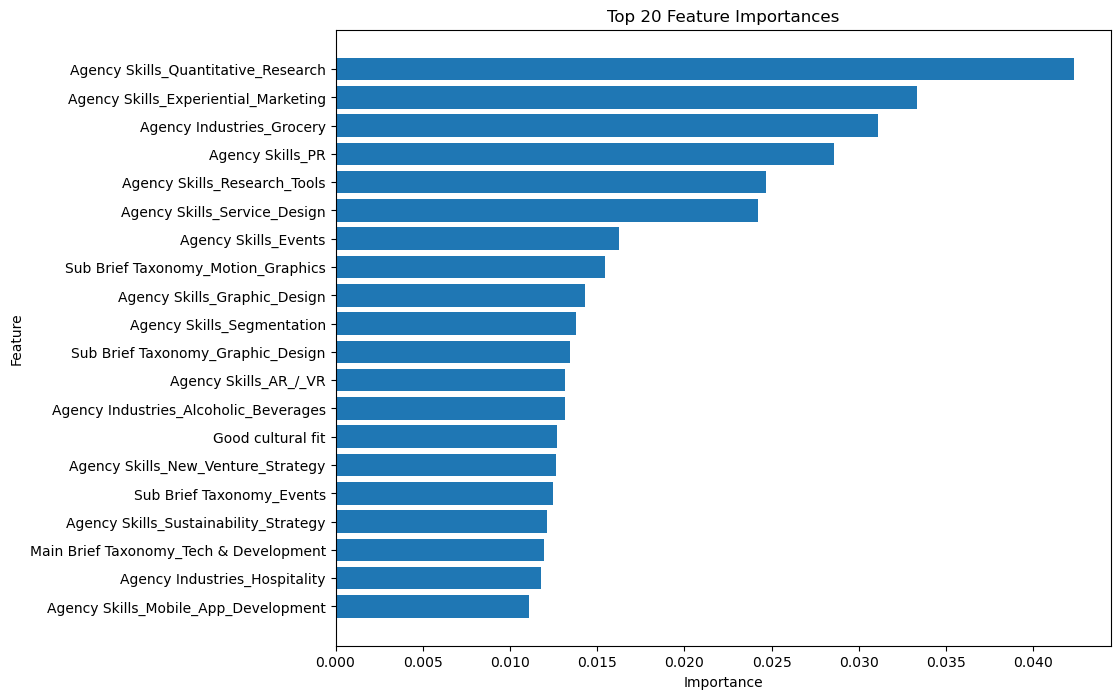

In [14]:
import matplotlib.pyplot as plt

# Get feature importances and their corresponding feature names
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold the importances and their corresponding features
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 197 entries, index to match
dtypes: float64(1), int64(193), object(3)
memory usage: 643.5+ KB


In [19]:
df1 = df.copy()
columns_to_drop = ["Project extension with same agency",
    "Client selected agency themselves from marketplace",
    "Right geography / time zone",
    "Strong skill set match",
    "Deep / relevant sector expertise",
    "Good cultural fit",
    "Right price level",
    "Strong track record"
]

df1 = df1.drop(columns=columns_to_drop)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 189 entries, index to match
dtypes: int64(186), object(3)
memory usage: 617.3+ KB


In [20]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score


# 1. Generate Negative Samples
all_agencies = df1['Shortlisted Agency'].unique()
negative_samples = []

for index, row in df1.iterrows():
    random_agency = np.random.choice(all_agencies)
    while ((df1['Brief Name'] == row['Brief Name']) & (df1['Shortlisted Agency'] == random_agency)).any():
        random_agency = np.random.choice(all_agencies)
    
    negative_sample = row.copy()
    negative_sample['Shortlisted Agency'] = random_agency
    negative_samples.append(negative_sample)

negative_df1 = pd.DataFrame(negative_samples)
df1 = pd.concat([df1, negative_df1], ignore_index=True)

df1['match'] = 1
df1.loc[df1.index >= len(df1) // 2, 'match'] = 0

# 2. Splitting Data
X = df1.drop(columns=['Client', 'Brief Name', 'Shortlisted Agency', 'match'])
y = df1['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [21]:
# 3. Train XGBoost Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# MAP
map_score = average_precision_score(y_test, y_pred_proba)
print(f"MAP: {map_score}")
from sklearn.metrics import average_precision_score

# NDCG function definition
def ndcg(y_true, y_score, k=None):
    """Compute Normalized Discounted Cumulative Gain."""
    # Order the scores
    ranking = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, ranking[:k])
    
    # Compute DCG
    dcg = np.sum(y_true / np.log2(np.arange(2, y_true.size + 2)))
    
    # Compute IDCG (Ideal DCG, where all the relevant items are placed at the top of the ranking)
    idcg = np.sum(np.ones_like(y_true) / np.log2(np.arange(2, y_true.size + 2)))
    
    # Compute NDCG
    return dcg / idcg



ndcg_value = ndcg(np.array([y_test.tolist()]), np.array([y_pred_proba.tolist()]))
print(f"NDCG: {ndcg_value}")


# 5. Recommend Agencies for a Random Brief
def recommend_agencies_for_random_brief():
    random_brief = df1.sample(1).iloc[0]
    all_agencies_data = df1[df1['Brief Name'] == random_brief['Brief Name']]
    
    X_recommend = all_agencies_data.drop(columns=['Client', 'Brief Name', 'Shortlisted Agency', 'match'])
    scores = model.predict_proba(X_recommend)[:, 1]

    results = pd.DataFrame({
        'Agency': all_agencies_data['Shortlisted Agency'],
        'Score': scores
    })
    
    recommended_agencies = results.sort_values(by='Score', ascending=False)
    return recommended_agencies

recommendations = recommend_agencies_for_random_brief()
print(recommendations.head(10))


Precision: 0.1625
Recall: 0.15476190476190477
F1 Score: 0.15853658536585366
MAP: 0.32403882190566935
NDCG: 0.5839838011467646
                        Agency     Score
15                         bbp  0.667484
224             Manifest Group  0.667484
433                       I-AM  0.667484
642           Studio Something  0.667484
13                  GH05T Ltd.  0.504294
222              Matic Digital  0.504294
431  Orange Panther Collective  0.504294
640                infogr8 Ltd  0.504294
14                 Buddy Media  0.498975
223              How To Impact  0.498975
